# Attribution: https://github.com/wxs/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb
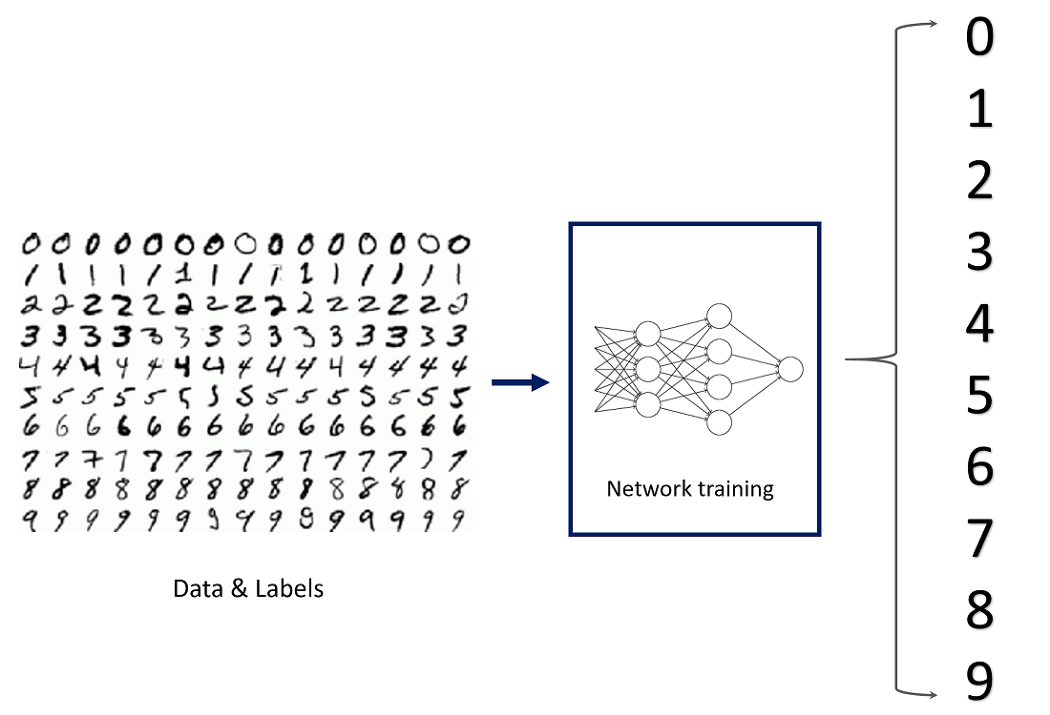

In [1]:
# Attribution: https://github.com/wxs/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
import tensorflow as tf

Using TensorFlow backend.


In [2]:
# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

11493376/11490434 [==============================] - 1s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)


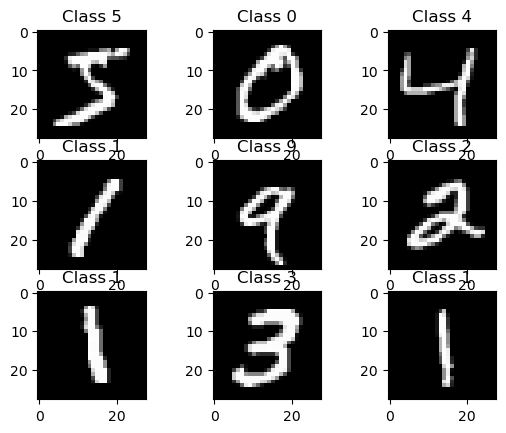

In [3]:
#plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [4]:

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [5]:
nb_classes = 10 # number of classification outputs 0..9
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [6]:
Y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [7]:
Y_train.shape

(60000, 10)

In [8]:
y_train.shape

(60000,)

Build the neural network
Build the neural-network. Here we'll do a simple 3 layer fully connected network.
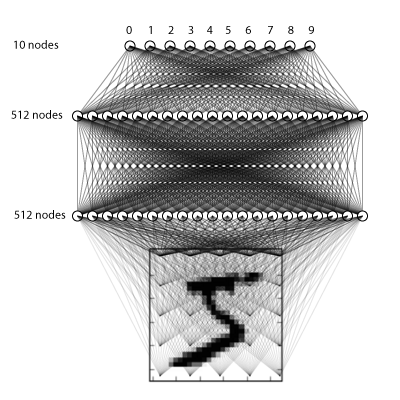

# Using CNN

In [9]:
print('Shape of x_train is {}'.format(X_train.shape))
print('Shape of x_test is {}'.format(X_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train is (60000, 784)
Shape of x_test is (10000, 784)
Shape of y_train is (60000,)
Shape of y_test is (10000,)


In [10]:
# Configuring X asnd Y shapes for CNN
X_train2 = X_train.reshape(X_train.shape[0], 28, 28, 1)   #samples, w, h, channels
X_test2 = X_test.reshape(X_test.shape[0], 28, 28, 1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print('Shape of x_train2 is {}'.format(X_train2.shape))
print('Shape of x_test2 is {}'.format(X_test2.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train2 is (60000, 28, 28, 1)
Shape of x_test2 is (10000, 28, 28, 1)
Shape of y_train is (60000, 1)
Shape of y_test is (10000, 1)


In [11]:
nb_classes = 10 # number of classification outputs 0..9
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print('Shape of Y_train is {}'.format(Y_train.shape))
print('Shape of Y_test is {}'.format(Y_test.shape))

Shape of Y_train is (60000, 10)
Shape of Y_test is (10000, 10)


In [12]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (2, 2), input_shape = (28, 28, 1), activation = 'relu'))
model_cnn.add(MaxPooling2D(pool_size = (2,2)))
model_cnn.add(Dropout(0.2))

model_cnn.add(Conv2D(64, (2, 2), activation = 'relu'))
model_cnn.add(MaxPooling2D(pool_size = (2,2)))
model_cnn.add(Dropout(0.2))

model_cnn.add(Conv2D(128, (2, 2), activation = 'relu'))
model_cnn.add(MaxPooling2D(pool_size = (2,2)))

model_cnn.add(Flatten())
model_cnn.add(Dense(units = 300, activation = 'relu'))
model_cnn.add(Dense(units = 10, activation = 'softmax'))

2022-12-04 15:46:33.694475: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-04 15:46:33.694924: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 16. Tune using inter_op_parallelism_threads for best performance.


In [13]:
model_cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [14]:
print(model_cnn.summary())
history = model_cnn.fit(X_train2,Y_train,epochs=5,batch_size=200,validation_split=.2,verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 128)        

In [15]:
score = model_cnn.evaluate(X_test2, Y_test, verbose=1)

10000/10000 [==============================] - 4s 357us/step


In [16]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


Text(0.5, 0, 'epoch')

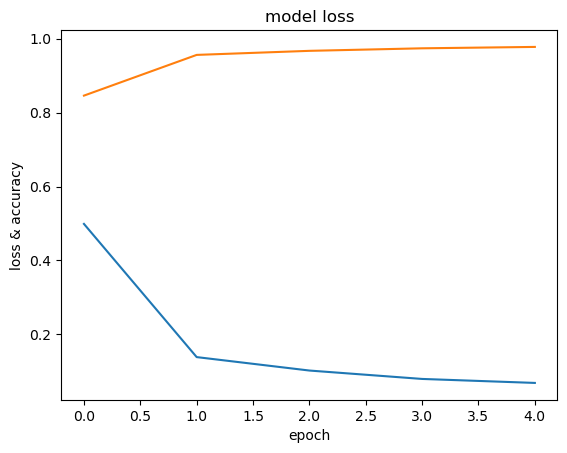

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss & accuracy')
plt.xlabel('epoch')

In [18]:
yhat2 = model_cnn.predict_classes(X_test2)
yhat2 = yhat2.reshape(-1,1)  #Need to ensure column vector in order for np.nonzero to work
print(yhat2.shape)
correct_indices = np.nonzero(yhat2 == y_test)[0]

(10000, 1)


In [20]:
correct_indices = np.nonzero(y_test==yhat2)[0]
incorrect_indices = np.nonzero(y_test!=yhat2)[0]
print(correct_indices.shape)
print(incorrect_indices.shape)

(9862,)
(138,)


In [22]:
acc = 100*len(correct_indices)/len(yhat2)
print('Test accuracy =', acc)

Test accuracy = 98.62


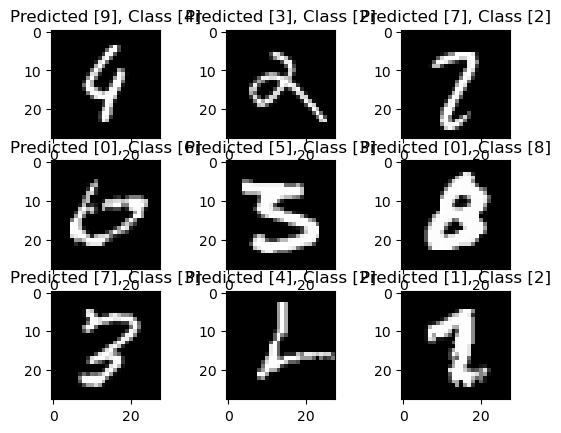

In [23]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(yhat2[incorrect], y_test[incorrect]))


In [24]:
model_cnn.save('my_model.h5') 